In [1]:
%matplotlib inline
import os
from kid_readout.measurement.io import readoutnc
from kid_readout.measurement.legacy import read

In [2]:
bb_ncs = ['2015-05-12_113832_mmw_noise_broadband.nc',  # 9.0
          '2015-05-12_120435_mmw_noise_broadband.nc',  # 8.5
          '2015-05-12_123322_mmw_noise_broadband.nc',  # 8.0
          '2015-05-12_133122_mmw_noise_broadband.nc',  # 7.5
          '2015-05-12_140235_mmw_noise_broadband.nc',  # 7.0
          '2015-05-12_192735_mmw_noise_broadband.nc',  # 6.5
          '2015-05-12_195908_mmw_noise_broadband.nc',  # 6.0
          '2015-05-12_203101_mmw_noise_broadband.nc',  # 5.5
          '2015-05-13_102207_mmw_noise_broadband.nc',  # 5.0
          '2015-05-13_113833_mmw_noise_broadband.nc',  # 4.5
          '2015-05-13_123152_mmw_noise_broadband.nc',  # 4.0
          '2015-05-13_151154_mmw_noise_broadband.nc',  # 3.5
          '2015-05-13_154402_mmw_noise_broadband.nc',  # 3.0
          ]

sweep_group_index = timestream_group_index = 4
tone_index = 8

In [5]:
bb = []
for nc in bb_ncs:
    rnc = readoutnc.ReadoutNetCDF(os.path.join('/data/readout', nc))
    bb.append(read.singlesweepstream_from_rnc(rnc=rnc,
                                              sweep_group_index=sweep_group_index,
                                              timestream_group_index=timestream_group_index,
                                              tone_index=tone_index))
    rnc.close()

In [35]:
s = bb[-1]
s.set_q_and_x(deglitch=True)
s.set_S(binned=True)

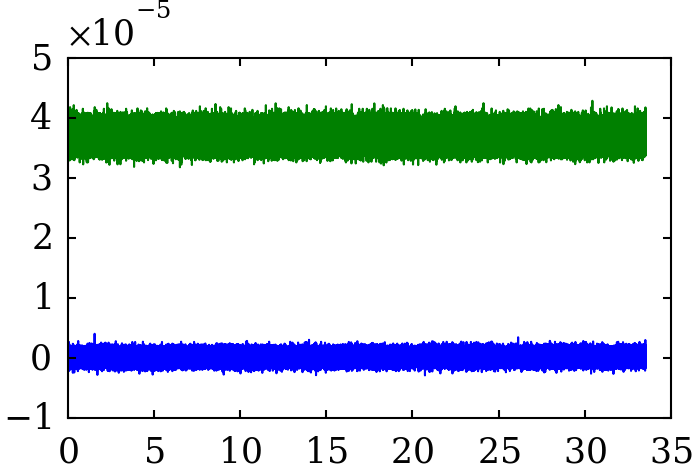

In [36]:
fig, ax = plt.subplots()
ax.plot(s.stream.sample_time, s.x)
ax.plot(s.stream.sample_time, s.q)

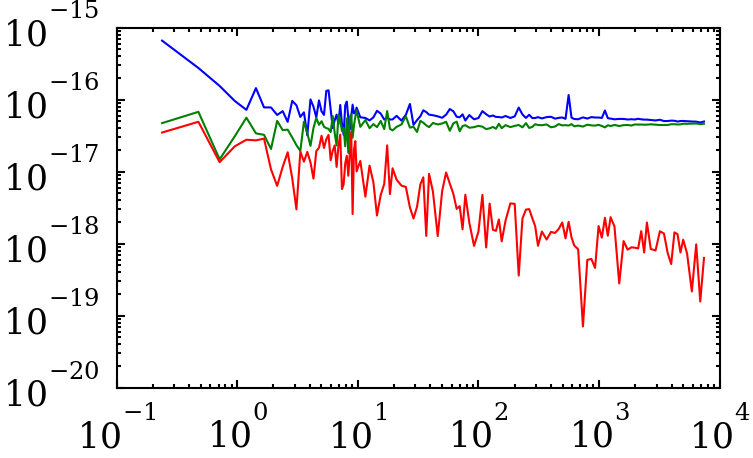

In [37]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(s.S_frequency, s.S_xx)
ax.plot(s.S_frequency, s.S_yy)
ax.plot(s.S_frequency, np.abs(s.S_xy))